In [218]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

In [219]:
df1 = pd.read_csv('/Users/Faaiz Anwar/Downloads/raw_sales.csv')
df1.head()

,datesold,postcode,price,propertyType,bedrooms
0,2/7/2007 0:00,2607,525000,house,4
1,2/27/2007 0:00,2906,290000,house,3
2,3/7/2007 0:00,2905,328000,house,3
3,3/9/2007 0:00,2905,380000,house,4
4,3/21/2007 0:00,2906,310000,house,3


In [220]:
df1.rename(columns={'datesold':'datesale'}, inplace=True)
df1.head()

,datesale,postcode,price,propertyType,bedrooms
0,2/7/2007 0:00,2607,525000,house,4
1,2/27/2007 0:00,2906,290000,house,3
2,3/7/2007 0:00,2905,328000,house,3
3,3/9/2007 0:00,2905,380000,house,4
4,3/21/2007 0:00,2906,310000,house,3


In [221]:
df1['datesale'] = pd.to_datetime(df1['datesale'])
df1.head()

,datesale,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [222]:
df1.isnull().sum()

datesale        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [223]:
df1.set_index("datesale",inplace=True)

In [224]:
df1.head(25)

,postcode,price,propertyType,bedrooms
datesale,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3
2007-04-04,2905,465000,house,4
2007-04-24,2607,399000,house,3
2007-04-30,2606,1530000,house,4
2007-05-24,2902,359000,house,3


In [225]:
df2 = df1.resample('M').mean()
df2.head(20)

,postcode,price,bedrooms
datesale,,,
2007-02-28,2756.500000,407500.000000,3.500000
2007-03-31,2905.333333,339333.333333,3.333333
2007-04-30,2706.000000,798000.000000,3.666667
2007-05-31,2904.000000,339500.000000,3.000000
2007-06-30,2757.500000,520333.333333,3.333333
2007-07-31,2668.684211,592078.947368,3.263158
2007-08-31,2775.869565,505608.695652,3.391304
2007-09-30,2681.950000,556875.000000,3.300000
2007-10-31,2743.500000,498600.000000,3.300000


<AxesSubplot:>

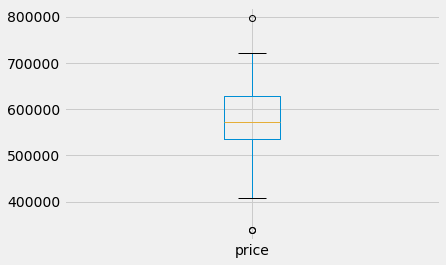

In [226]:
df2.loc[:,['price']].boxplot()

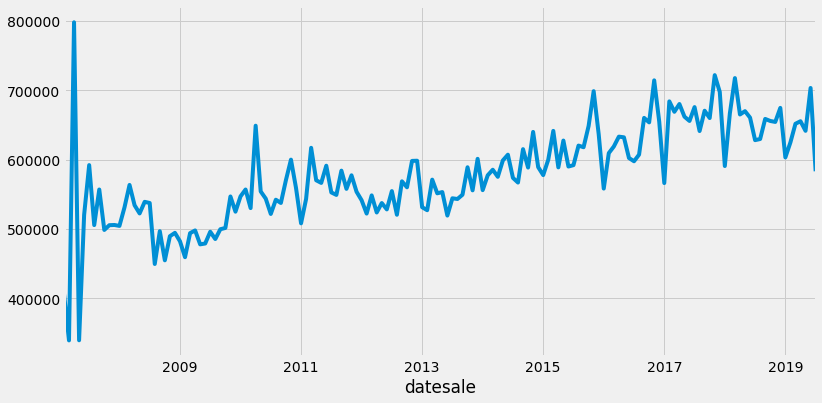

In [227]:
fig, ax = plt.subplots(figsize=(12,6))
df2['price'].plot()
plt.show()

In [228]:
for n in df2['price']:
    if n > df2['price'].mean() + np.std(df2['price'])*2 or n < df2['price'].mean() - np.std(df2['price'])*2:
        df2[df2 == n] = df2['price'].mean()

In [229]:
for n in df2['price']:
    if n > df2['price'].mean() + np.std(df2['price'])*2 or n < df2['price'].mean() - np.std(df2['price'])*2:
        print(n)

698680.5721393034


<AxesSubplot:>

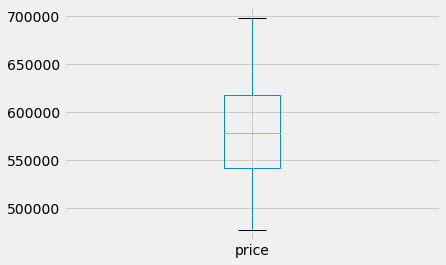

In [230]:
df2.loc[:,['price']].boxplot()

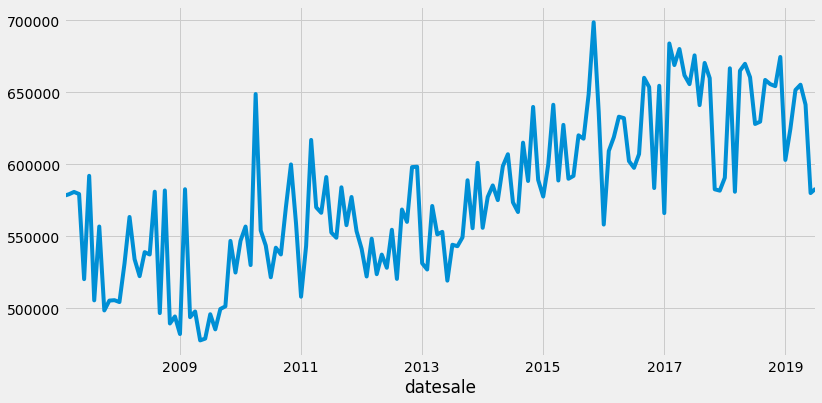

In [231]:
fig, ax = plt.subplots(figsize=(12,6))
df2['price'].plot()
plt.show()

In [232]:
print("value:", adfuller(df2['price'])[0],
     "p-value:", adfuller(df2['price'])[1],
     "conf:", adfuller(df2['price'])[4])

value: -0.9647364484957975 p-value: 0.7659076765447868 conf: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


In [233]:
df2 = df2.diff()
df2.dropna(inplace=True)
print("value:", adfuller(df2['price'])[0],
     "p-value:", adfuller(df2['price'])[1],
     "conf:", adfuller(df2['price'])[4])

value: -6.122559234641562 p-value: 8.783799060238315e-08 conf: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


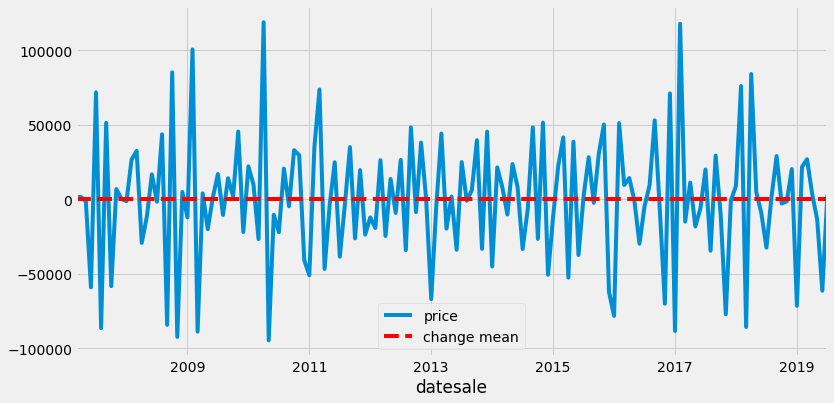

In [234]:
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')
df2['price'].plot()
plt.axhline(y=df2['price'].mean(), color='red', ls='--', label='change mean')
plt.legend()
plt.show()

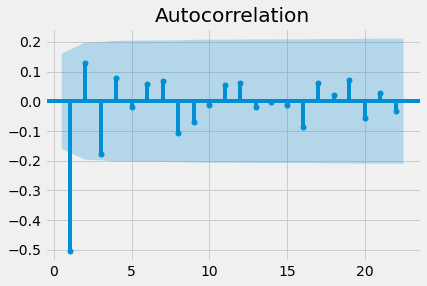

In [235]:
plot_acf(df2['price'], zero=False)
plt.show()

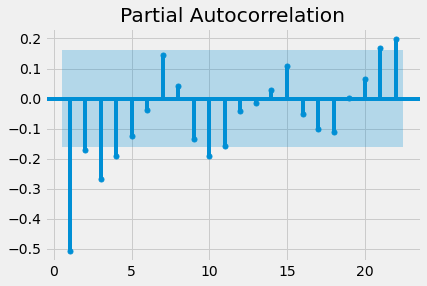

In [236]:
plot_pacf(df2['price'], zero=False)
plt.show()

In [237]:
modelo = SARIMAX(df2['price'], order=(1,1,(1,1,1,1)))
res = modelo.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  149
Model:               SARIMAX(1, 1, 4)   Log Likelihood               -1755.738
Date:                Sun, 30 May 2021   AIC                           3523.475
Time:                        10:15:04   BIC                           3541.459
Sample:                    03-31-2007   HQIC                          3530.782
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5387      0.542     -0.993      0.321      -1.602       0.524
ma.L1         -1.1606      0.551     -2.108      0.035      -2.240      -0.081
ma.L2         -0.1561      0.935     -0.167      0.8

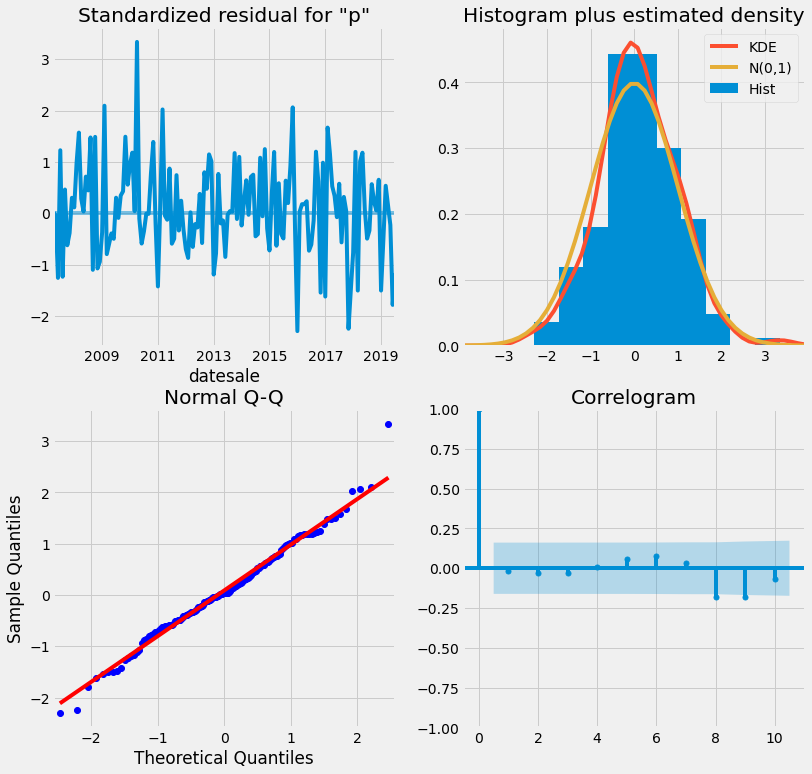

In [238]:
res.plot_diagnostics(figsize=(12,12))
plt.show()

In [239]:
pred = res.get_prediction(start = '2012', end= '2019')
pred_ci = pred.conf_int()

<ipython-input-240-54544507cdf3>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.fill_between(pred_ci.index,


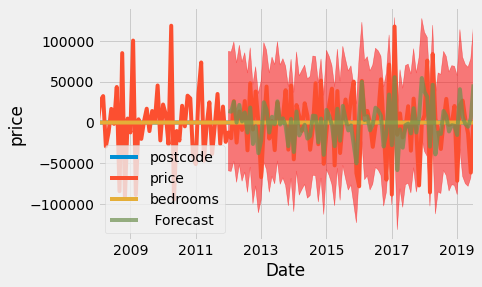

In [240]:
ax = df2['2008':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label=' Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='rgb', alpha=.5)

ax.set_xlabel('Date')
ax.set_ylabel('price')
plt.legend()

plt.show()

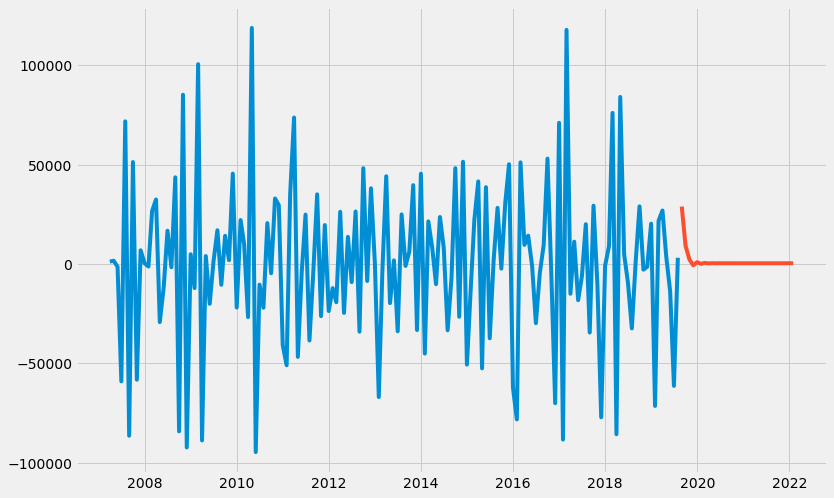

In [241]:
diff_forecast = res.get_forecast(steps=30)
forecast_mean = diff_forecast.predicted_mean

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df2['price'])
plt.plot(forecast_mean)
plt.show()

In [242]:
y_forecasted = pred.predicted_mean
y_truth = df2['2016-10-31':]
print(y_forecasted.shape, y_truth.iloc[:,0].shape)

(91,) (34,)


In [243]:
mse = ((y_forecasted - y_truth.iloc[:,0]) ** 0.02).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.22


In [244]:
mse = ((y_forecasted - y_truth.iloc[:,0]) ** 0.02).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.22
